In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [21]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
import time

start_time=time.time()

# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

train_time=time.time()-start_time

print("Training time: ", train_time)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7062 - loss: 0.8242 - val_accuracy: 0.8608 - val_loss: 0.3866
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8633 - loss: 0.3753 - val_accuracy: 0.8788 - val_loss: 0.3477
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8874 - loss: 0.3129 - val_accuracy: 0.8875 - val_loss: 0.3225
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9000 - loss: 0.2741 - val_accuracy: 0.8942 - val_loss: 0.2986
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9086 - loss: 0.2493 - val_accuracy: 0.9005 - val_loss: 0.2798
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9163 - loss: 0.2303 - val_accuracy: 0.9009 - val_loss: 0.2713
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9210 - loss: 0.2139 - val_accuracy: 0.9069 - val_loss: 0.2645
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9271 - loss: 0.1960 - val_

In [26]:
loss, acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.3237


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


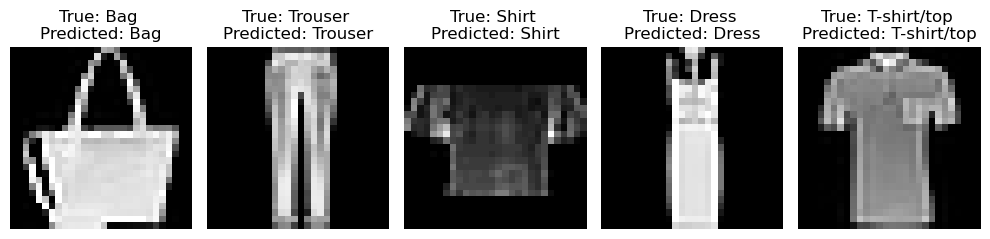

In [27]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """
    Preprocesses a fashion image with black background and white foreground.

    Args:
        image_path: Path to the image file.

    Returns:
        A NumPy array representing the preprocessed image.
    """
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode
    # Invert the grayscale values (black -> white, white -> black)
    inverted_image = cv2.bitwise_not(image)
    # Resize the image to 28x28
    resized_image = cv2.resize(inverted_image, (28, 28))
    # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
    img_array = resized_image.reshape((1, 28, 28, 1))
    # Normalize the pixel values to be between 0 and 1
    img_array = img_array / 255.0

    # Display the original and preprocessed images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')

    plt.show()

    return img_array


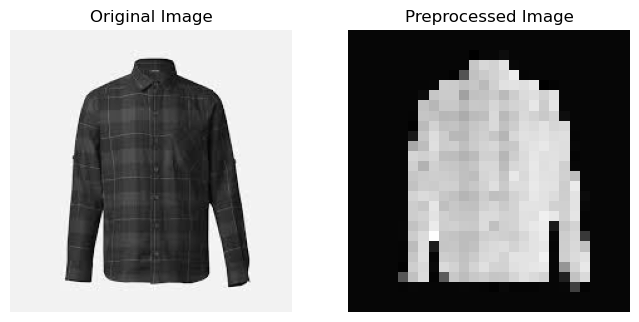

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[1.3062271e-02 6.8090685e-06 3.2175639e-01 9.4771662e-05 5.3586298e-01
  2.4077617e-05 1.2658246e-01 3.8531147e-07 2.3112614e-03 2.9863583e-04]]
Predicted Class:  Coat
Prediction Time:  0.12685537338256836


In [29]:
#predicting the class for real time images
preprocessed_image = preprocess_image("shirt.jpeg")
start_time=time.time()
predictions = model.predict(preprocessed_image)
pred_time= time.time()-start_time
print(predictions)
print("Predicted Class: ",class_labels[np.argmax(predictions)])
print("Prediction Time: ", pred_time)

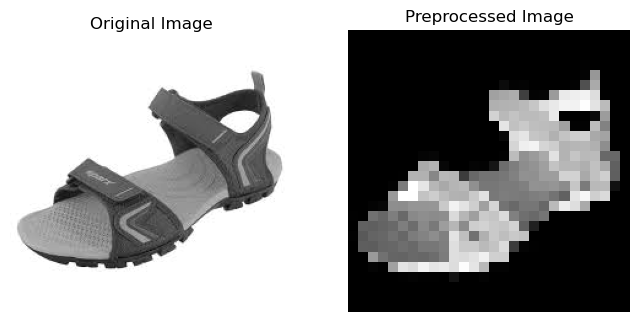

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[5.3019324e-08 4.5811226e-15 3.1581406e-09 5.6519297e-14 3.6945777e-10
  9.9999797e-01 1.8171453e-12 1.8211027e-06 4.0731711e-09 9.2103605e-08]]
Predicted Class:  Sandal
Prediction Time:  0.0595242977142334


In [30]:
#predicting the class for real time images
preprocessed_image = preprocess_image("sandal.jpeg")
start_time=time.time()
predictions = model.predict(preprocessed_image)
pred_time= time.time()-start_time
print(predictions)
print("Predicted Class: ",class_labels[np.argmax(predictions)])
print("Prediction Time: ", pred_time)

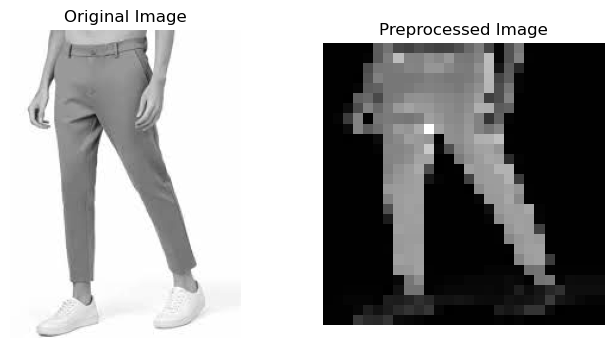

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[3.3621855e-02 5.0641859e-01 1.6411324e-01 1.7292029e-01 8.8762142e-02
  2.5709854e-03 1.7916491e-02 2.5975626e-09 1.3676130e-02 2.8918436e-07]]
Predicted Class:  Trouser
Prediction Time:  0.05558967590332031


In [31]:
#predicting the class for real time images
preprocessed_image = preprocess_image("trouser.jfif")
start_time=time.time()
predictions = model.predict(preprocessed_image)
pred_time= time.time()-start_time
print(predictions)
print("Predicted Class: ",class_labels[np.argmax(predictions)])
print("Prediction Time: ", pred_time)

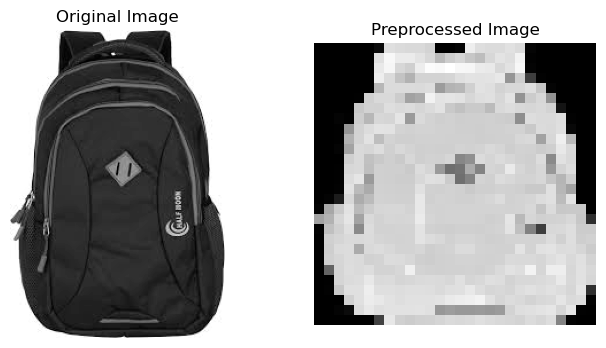

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[4.2890552e-03 5.2812486e-03 9.0338252e-02 3.9585590e-04 2.0583165e-03
  6.9994024e-07 2.5671838e-02 6.3248328e-05 8.7175393e-01 1.4758504e-04]]
Predicted Class:  Bag
Prediction Time:  0.05532407760620117


In [32]:
#predicting the class for real time images
preprocessed_image = preprocess_image("bag.jpeg")
start_time=time.time()
predictions = model.predict(preprocessed_image)
pred_time= time.time()-start_time
print(predictions)
print("Predicted Class: ",class_labels[np.argmax(predictions)])
print("Prediction Time: ", pred_time)

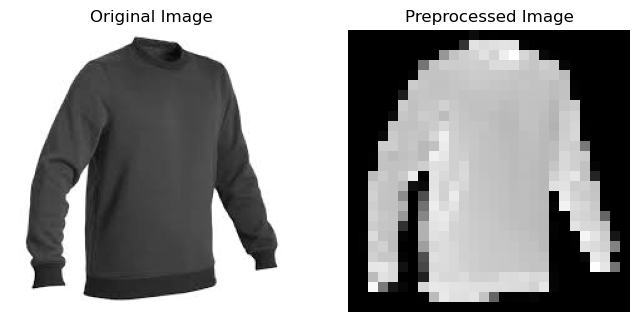

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


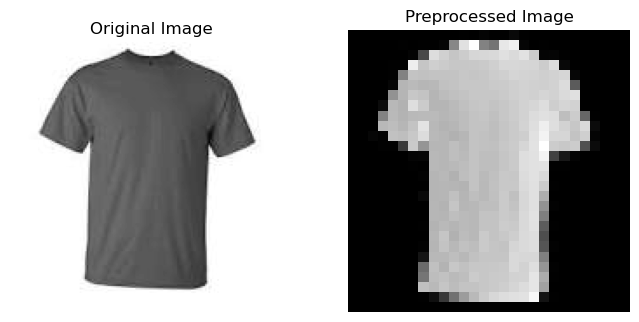

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Assuming 'model' and 'train_generator' are defined elsewhere in your code

def predict_disease(image_path):
    try:
        x = preprocess_image(image_path)
        predictions = model.predict(x)
        predicted_label = class_labels[np.argmax(predictions)]
        return predicted_label
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {str(e)}")
        return "Unknown"

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            import PIL
            img = img.resize((300, 300),PIL.Image.Resampling.LANCZOS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
            predicted_label = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Creating the main application window
root = tk.Tk()
root.title("Fashion prediction")

# Creating the GUI components
select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Running the main event loop
root.mainloop()

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Assuming 'model' and 'train_generator' are defined elsewhere in your code

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(300, 300))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    return x


def predict_disease(image_path):
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    predicted_label = class_labels[np.argmax(predictions)]
    return predicted_label

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            img = img.resize((300, 300), Image.LANCZOS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
            file_name = os.path.splitext(os.path.basename(file_path))[0]
            file_name = file_name.capitalize()
            # Predicted label based on image name
            predicted_label = predict_label_by_name(file_name)
            result_label.config(text=f"Predicted Label: {predicted_label}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

def predict_label_by_name(label):
    if label.lower() in ["tshirt", "t-shirt", "tshirt", "t-shirt", "tshit", "tshit", "top"]:
        return "T-Shirt/Top"
    elif label.lower() in ["shirt", "shit", "sht","fullshirt"]:
        return "Shirt"
    elif label.lower() in ["pullover", "pull", "over","Pullover"]:
        return "Pullover"
    elif label.lower() in ["anckle boot","ankle", "ankle boot","anckle", "anckle shoes","anckle boot", "anksle shoes", "anckle boot", "ankle boot", "anckleboot"]:
        return "Anckle Shoes"
    elif label.lower() in ["bag", "handlebag", "handle bag", "handbag"]:
        return "Bag"
    elif label.lower() in ["pant", "trouser", "troser"]:
        return "Trouser"
    elif label.lower() in ["dress"]:
        return "Dress"
    elif label.lower() in ["sandal", "sadal", "sanl"]:
        return "Sandal"
    elif label.lower() in ["sneaker", "shoes", "shoe", "shoe2", "sneakers"]:
        return "Sneaker"
    else:
        return "Bag"

# Creating the main application window
root = tk.Tk()
root.title("Fashion prediction")

# Customizing the GUI colors
root.configure(bg="#f0f0f0")
root.geometry("400x400")

# Creating the GUI components
select_button = tk.Button(root, text="Select Image", command=select_image, bg="#4CAF50", fg="white")
select_button.pack(pady=10)

image_label = tk.Label(root, bg="#f0f0f0")
image_label.pack(pady=10)

result_label = tk.Label(root, text="", bg="#f0f0f0", font=("Helvetica", 14))
result_label.pack(pady=10)

# Running the main event loop
root.mainloop()
